In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [40]:
def read_data():
    
    X = pd.DataFrame(load_iris().data, columns=load_iris().feature_names).values
    ones = np.ones((X.shape[0],1))
    X = np.insert(X, 0, ones, 1)
    
    Y = load_iris().target
    Y = Y.reshape(Y.shape[0],1)
    
    return X,Y

In [41]:
def init_params(X):
    return np.zeros((X.shape[1],1))

In [42]:
def predict(X, params):
    return sigmoid(X@params)

In [43]:
def cross_entropy_cost(Y_pred, Y_true):
    return -(((1-Y_true) * np.log(1- Y_pred)) + (Y_true * np.log(Y_pred))).sum()

In [44]:
def gradient_descent(params, X, Y, learning_rate, number_of_iterations):
    
    jh = np.zeros((number_of_iterations, 1))
    
    for i in range(number_of_iterations):
        Y_pred = predict(X, params)
        params = params - ((learning_rate/X.shape[0]) * (X.T @ (Y_pred - Y)))
        jh[i] = cross_entropy_cost(Y_pred, Y)
    
    plt.plot(range(len(jh)), jh, 'm')
    plt.xlabel("# of iterations")
    plt.ylabel("Cost (J)")
    plt.title("Cost Convergence")
    plt.show()
    
    return params

In [45]:
X,Y = read_data()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [46]:
Y_train_0 = (Y_train == 0).astype(int)

In [47]:
Y_train_1 = (Y_train == 1).astype(int)

In [48]:
Y_train_2 = (Y_train == 2).astype(int)

In [50]:
params0 = init_params(X_train)
params1 = init_params(X_train)
params2 = init_params(X_train)

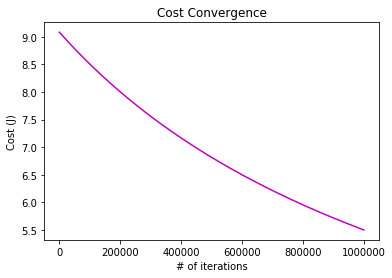

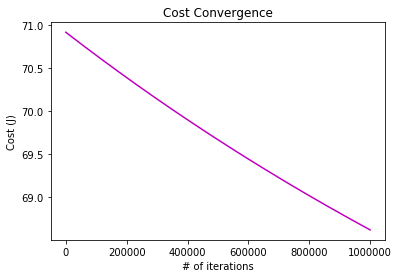

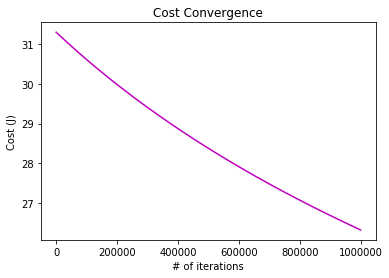

In [74]:
params0 = gradient_descent(params0, X_train, Y_train_0, 0.000005, 1000000)
params1 = gradient_descent(params1, X_train, Y_train_1, 0.000005, 1000000)
params2 = gradient_descent(params2, X_train, Y_train_2, 0.000005, 1000000)

In [75]:
Y_pred_0 = predict(X_train, params0)
Y_pred_1 = predict(X_train, params1)
Y_pred_2 = predict(X_train, params2)

In [76]:
Y_pred_final = np.zeros((Y_train.shape[0],1))
for i in range(len(Y_train)):
    if Y_pred_0[i] > Y_pred_1[i]:
        if Y_pred_2[i] > Y_pred_0[i]:
            Y_pred_final[i] = 2
        else:
            Y_pred_final[i] = 0
    else:
        if Y_pred_2[i] > Y_pred_1[i]:
            Y_pred_final[i] = 2
        else:
            Y_pred_final[i] = 1
    

In [77]:
Y_pred = Y_pred_final.astype(int)

In [78]:
print("Train Accuracy: {}".format(round((Y_pred == Y_train).astype(int).sum() * 100/len(Y_train) ,2)))

Train Accuracy: 91.67


In [86]:
print("Class 0: {}".format(predict(X_test[20], params0)))
print("Class 1: {}".format(predict(X_test[20], params1)))
print("Class 2: {}".format(predict(X_test[20], params2)))

Class 0: [0.00240979]
Class 1: [0.37766867]
Class 2: [0.8072276]


In [87]:
print(Y_test[20])

[2]
